<a href="https://colab.research.google.com/github/Archita14Singh/ANNProject/blob/main/cnn_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Required Libraries

In [ ]:
!pip install tensorflow tensorflow-datasets


Import Libraries

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


Load CIFAR-10 Dataset

In [ ]:
(dataset_train, dataset_test), info = tfds.load(
    "cifar10",
    split=["train", "test"],
    as_supervised=True,
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.GHKNYC_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.GHKNYC_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
class_names = info.features['label'].names
print(class_names)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Define Image Parameters

In [ ]:
IMG_SIZE = 32   # CIFAR-10 images are 32x32
BATCH_SIZE = 64


Image Preprocessing Function

In [ ]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32)  # convert uint8 → float32
    image = image / 255.0               # normalize
    return image, label



Preprocessing, Shuffle & Batch

In [ ]:
train_data = dataset_train.map(preprocess)
test_data = dataset_test.map(preprocess)

train_data = train_data.shuffle(10000).batch(BATCH_SIZE)
test_data = test_data.batch(BATCH_SIZE)


CNN Architecture

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Compile model


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Train model

In [ ]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 104ms/step - accuracy: 0.3381 - loss: 1.7837 - val_accuracy: 0.5454 - val_loss: 1.2641
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 100ms/step - accuracy: 0.5686 - loss: 1.2159 - val_accuracy: 0.6015 - val_loss: 1.1332
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 96ms/step - accuracy: 0.6340 - loss: 1.0399 - val_accuracy: 0.6478 - val_loss: 1.0217
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.6867 - loss: 0.9067 - val_accuracy: 0.6729 - val_loss: 0.9496
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.7149 - loss: 0.8219 - val_accuracy: 0.7031 - val_loss: 0.8769
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 96ms/step - accuracy: 0.7409 - loss: 0.7386 - val_accuracy: 0.7034 - val_loss: 0.8713
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.7661 - loss: 0.6753 - val_accuracy: 0.7084 - val_loss: 0.8729
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 96ms/step - accuracy: 0.7844 - loss: 0.6200 

evaluate

In [ ]:
loss, accuracy = model.evaluate(test_data)
print("Test Accuracy:", accuracy)


157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7201 - loss: 0.8625
Test Accuracy: 0.7120000123977661


plot accuracy

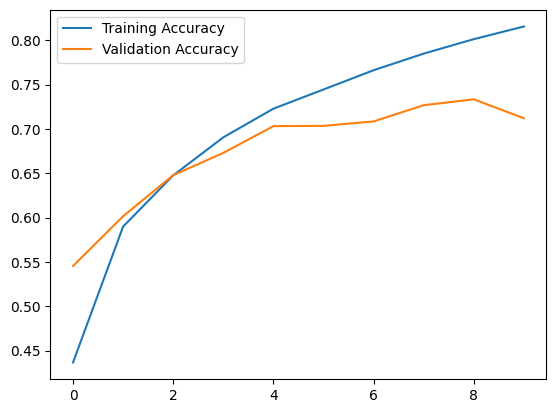

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

print("Predicted Class:", predicted_class)


Saving dog.jpg to dog.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted Class: bird
